# EPA Region 3 from Outer Space

The sample code below is a demo of the capabilities within the ArcGIS API for Python, including the creating of maps with imagery provided by NASA and USGS that contains data collected with Remote Sensing techniques.

## Landsat imagery

ArcGIS Online provides multispectral landsat imagery layer, that we'll be using in this notebook. Let's connect to ArcGIS Online and query for the "Landsat Multispectral" imagery layer:

In [48]:
from arcgis.gis import GIS

In [50]:
gis = GIS()

In [51]:
weather_item = gis.content.search('The Weather Company')[0]

In [52]:
weather_item

<Item title:"The Weather Company Current Global Doppler Radar and Satellite Imagery" type:Web Map owner:jeffgawrych>

In [58]:
from arcgis.mapping import WebMap
weather = WebMap(weather_item)
weather

In [54]:
weather.values()

odict_values([[{'templateUrl': 'https://api.weather.com/v3/TileServer/tile/satrad?ts=1532493900&xyz={col}:{row}:{level}&apiKey=f60f9ecb790749d38f9ecb790729d3be', 'copyright': 'The Weather Company-IBM', 'fullExtent': {'xmin': -20037508.342787, 'ymin': -20037508.34278, 'xmax': 20037508.34278, 'ymax': 20037508.342787, 'spatialReference': {'wkid': 102100}}, 'opacity': 1, 'visibility': True, 'id': 'WebTiled_7300', 'title': 'Satellite and Radar as of 2018-07-25 04:45:00 UTC', 'type': 'WebTiledLayer', 'layerType': 'WebTiledLayer'}], {'baseMapLayers': [{'id': 'World_Hillshade_3805', 'layerType': 'ArcGISTiledMapServiceLayer', 'url': 'https://services.arcgisonline.com/arcgis/rest/services/Elevation/World_Hillshade/MapServer', 'visibility': True, 'opacity': 1, 'title': 'World Hillshade'}, {'id': 'VectorTile_2333', 'type': 'VectorTileLayer', 'layerType': 'VectorTileLayer', 'title': 'World Topographic Map', 'styleUrl': 'https://www.arcgis.com/sharing/rest/content/items/7dc6cea0b1764a1f9af2e679f642f

In [62]:
landsat_item = gis.content.search('"Landsat Multispectral"', 'Imagery Layer')[0]

In [56]:
landsat_item

<Item title:"Landsat_Multispectral" type:Imagery Layer owner:Craig_ESRIAU>

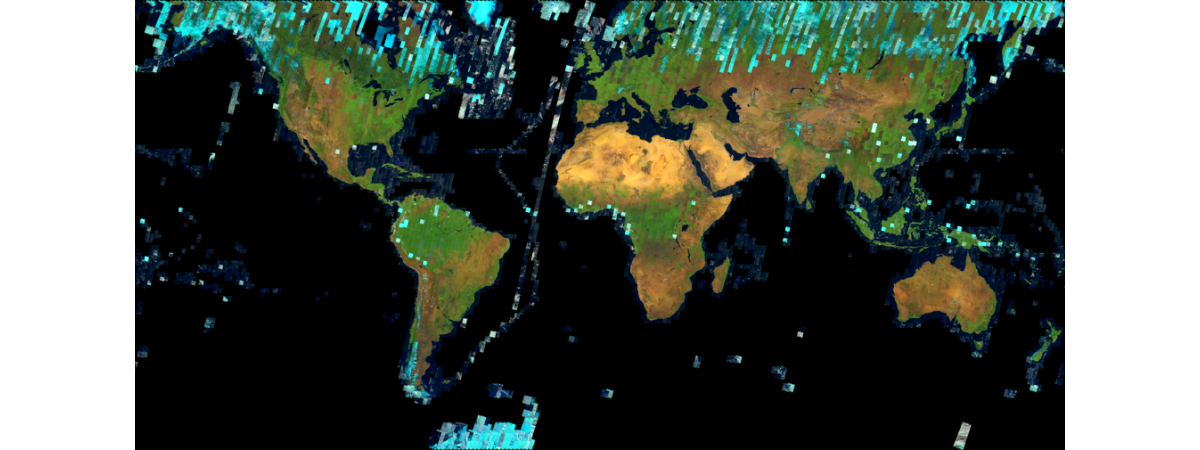

In [57]:
landsat = landsat_item.layers[0]
landsat

## Raster processing

The examples below will be extracting a particular band combination from the landsat layer, and applying a 'Percent Clip' stretch to enhance the raster so it looks more vibrant. Here, we define a Python function that will first use the `extract_band` raster function to extract the specified band combination from the input raster, and then feed the output to the `stretch` raster function. This function will be used by each example below to display different points of interest around the world.

In [14]:
def extract_stretch(bandids):
    return stretch(extract_band(landsat, bandids),
                   stretch_type='PercentClip',
                   min_percent=2, 
                   max_percent=2,
                   dra=True, 
                   gamma=[0.8,0.8,0.8])

## Philadelphia


Green vegetation appears green in this band combination. The blue band is set to the blue channel here, so the water appears blue.

In [61]:
philly = gis.map('Philadelphia. PA', 10)
philly

In [60]:
philly.add_layer(extract_stretch([5, 4, 1]))

## Erie, PA

Bands that accentuate geologic structure. These particular bands are not always used for geology, site specific minerals and characteristics may call for a different combination.

In [70]:
erie = gis.map("erie, pa", 11)
erie

In [71]:
erie.add_layer(extract_stretch([6, 3, 1]))

## Annapolis, MD

In clear water, Landsat sensors can penetrate nearly 100 feet (30m).

The water is so clear and shallow in this area that underwater features are easily distinguished. Green vegetation appears red.

In [72]:
m4 = gis.map("annapolis, md", 11)
m4.add_layer(extract_stretch([5, 3, 0]))
m4

## Wheeling, WV



Short-wave Infrared with DRA (7,6,4): This band combination is used so that green vegetation appears green in the image.

In [73]:
wheel = gis.map("wheeling, wv", 10)
wheel

In [74]:
wheel.add_layer(extract_stretch([6, 5, 3]))




### Closing words

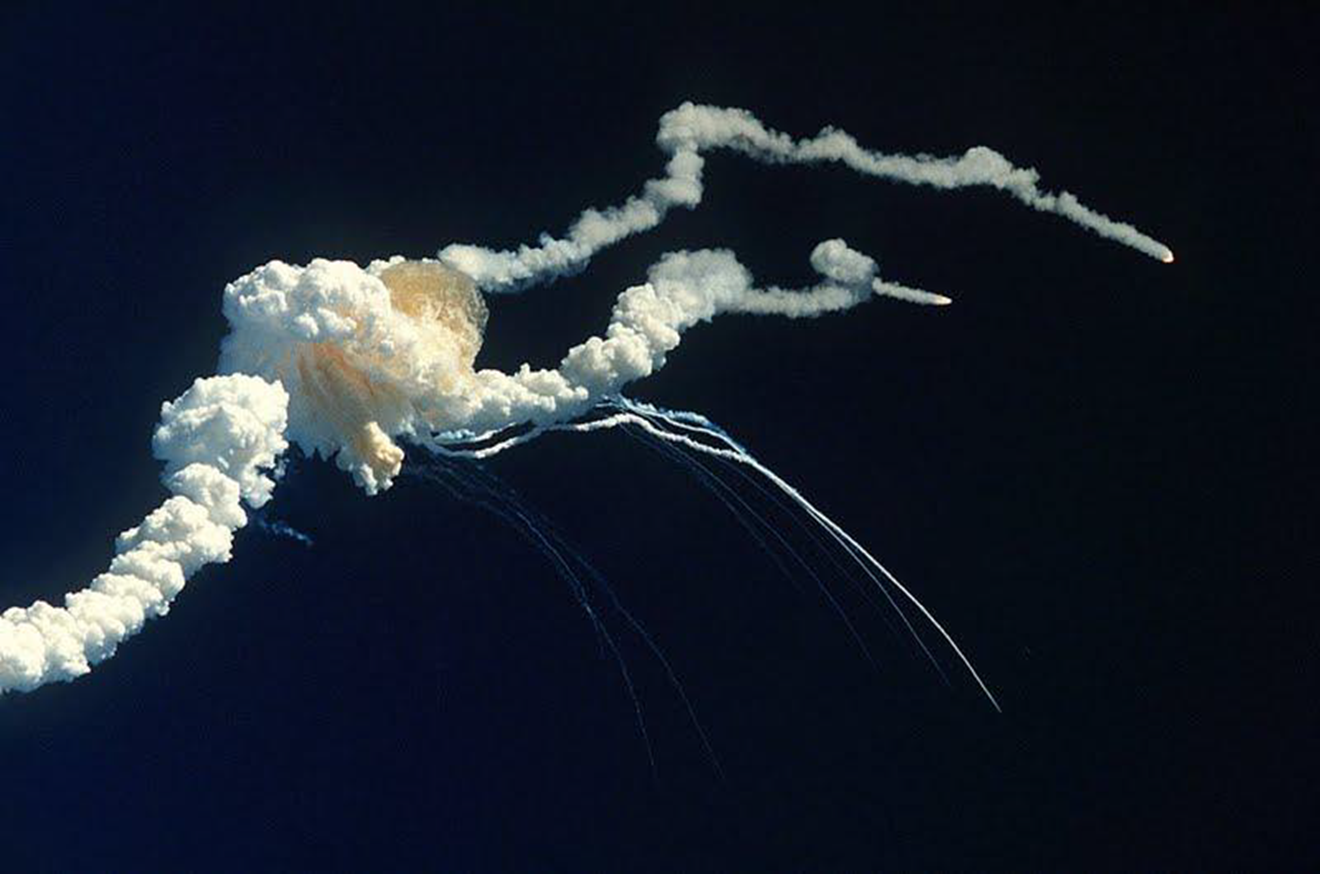

# "If I can get some student interested in science, if I can show members of the general public what's going on up there in the space program, then my job's been done.“ Sharon Christa McAuliffe   